### 1. Data Preprocessing

In [ ]:
#Split the dataset into training and testing sets using an 80-20 split
import pandas as pd
import numpy as np
from scipy import stats
data=pd.read_csv('taxi_fare_data.csv')
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data,test_size=0.2,random_state=42)

#Handle missing values and perform necessary data cleaning
print(data.isnull().sum())  #no null values so handling missing values not required

#Perform feature scaling or normalization if required
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[['distance_traveled','trip_duration','num_of_passengers','fare','tip','miscellaneous_fees','total_fare']]=scaler.fit_transform(data[['distance_traveled', 'trip_duration','num_of_passengers','fare','tip','miscellaneous_fees','total_fare']])
data.head()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64


,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,-0.089031,-0.018403,-0.314593,-0.287649,0.538557,-0.703939,-0.227649,0
1,0.002894,-0.012973,-0.314593,0.062809,0.538557,-0.154287,0.145843,0
2,-0.092800,-0.015449,-0.314593,-0.331456,-0.639778,0.915144,-0.302803,1
3,-0.105155,0.004597,1.834208,-0.112420,-0.639778,-0.429113,-0.283825,0
4,-0.176768,-0.023674,-0.314593,-0.638106,-0.050611,-0.154287,-0.582923,0


## 2. Feauture Engineering

In [ ]:
#Analyze the provided features and identify potential feature transformations or combinations that can enhance the model’s performance. Use correlations and heatmaps
import seaborn as sns
import matplotlib.pyplot as plt
data.corr()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
trip_duration,1.000000,0.005774,-0.001477,0.150331,0.029132,0.046432,0.142159,0.029961
distance_traveled,0.005774,1.000000,-0.000299,0.035934,0.013487,0.021734,0.036677,0.005567
num_of_passengers,-0.001477,-0.000299,1.000000,0.013224,0.007277,0.010044,0.014234,0.006360
fare,0.150331,0.035934,0.013224,1.000000,0.302044,0.299321,0.966748,0.146687
tip,0.029132,0.013487,0.007277,0.302044,1.000000,0.320919,0.508639,0.239334
miscellaneous_fees,0.046432,0.021734,0.010044,0.299321,0.320919,1.000000,0.452568,0.715497
total_fare,0.142159,0.036677,0.014234,0.966748,0.508639,0.452568,1.000000,0.267350
surge_applied,0.029961,0.005567,0.006360,0.146687,0.239334,0.715497,0.267350,1.000000


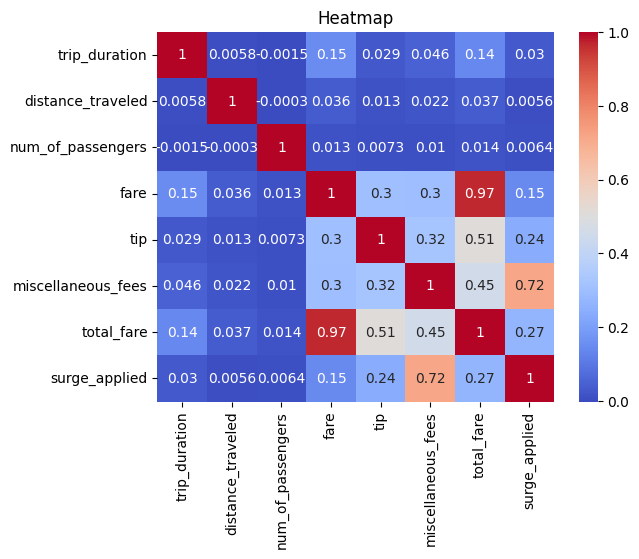

In [ ]:
#Heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

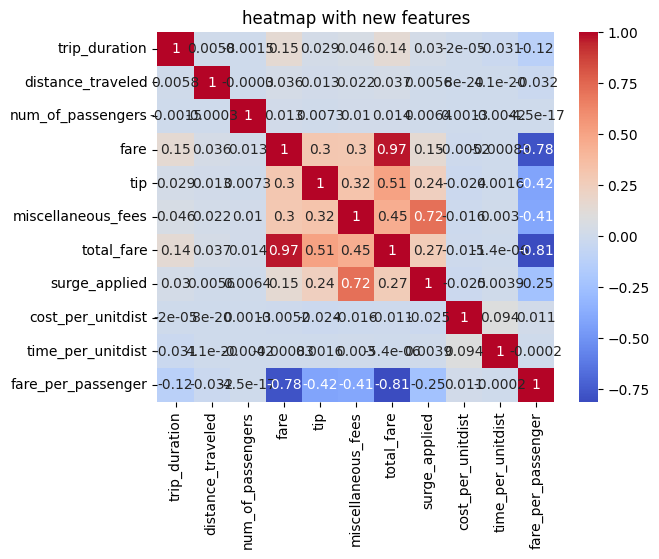

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,cost_per_unitdist,time_per_unitdist,fare_per_passenger
0,-0.089031,-0.018403,-0.314593,-0.287649,0.538557,-0.703939,-0.227649,0,12.369894,4.837740,0.723630
1,0.002894,-0.012973,-0.314593,0.062809,0.538557,-0.154287,0.145843,0,-11.242149,-0.223045,-0.463593
2,-0.092800,-0.015449,-0.314593,-0.331456,-0.639778,0.915144,-0.302803,1,19.600665,6.007036,0.962522
3,-0.105155,0.004597,1.834208,-0.112420,-0.639778,-0.429113,-0.283825,0,-61.747146,-22.876805,-0.154740
4,-0.176768,-0.023674,-0.314593,-0.638106,-0.050611,-0.154287,-0.582923,0,24.622561,7.466660,1.852939
...,...,...,...,...,...,...,...,...,...,...,...
209668,0.092934,0.026878,-0.314593,0.588494,1.667795,-0.743769,0.759222,0,28.247093,3.457633,-2.413342
209669,-0.153944,-0.030063,-0.314593,-0.594298,-0.050611,1.548438,-0.328614,1,10.930748,5.120674,1.044566
209670,-0.126094,-0.017844,-0.314593,-0.419070,-0.639778,-0.727837,-0.587477,0,32.922126,7.066304,1.867417
209671,-0.142846,-0.023115,-0.314593,-0.506684,-0.639778,-0.130389,-0.587477,0,25.415089,6.179718,1.867417


In [ ]:
#Creating new features
data["cost_per_unitdist"]=data["total_fare"]/data["distance_traveled"]
data["time_per_unitdist"]=data["trip_duration"]/data["distance_traveled"]
data["fare_per_passenger"]=data["total_fare"]/data["num_of_passengers"]
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("heatmap with new features")
plt.show()
data

In [ ]:
#Encode categorical variables using appropriate techniques

## 3. Model Training

Implement the different Machine Learning Models using each of the independent features. Calculate the MSE and accuracy values for each of the models

In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X_train = train_data.drop('fare', axis=1)
y_train = train_data['fare']
X_test = test_data.drop('fare', axis=1)
y_test = test_data['fare']

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_lin}")

# Decision Tree
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree MSE: {mse_tree}")

# Random Forest
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f"Random Forest MSE: {mse_forest}")

models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [mse_lin, mse_tree, mse_forest]'''

'from sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import mean_squared_error\nimport matplotlib.pyplot as plt\n\nX_train = train_data.drop(\'fare\', axis=1)\ny_train = train_data[\'fare\']\nX_test = test_data.drop(\'fare\', axis=1)\ny_test = test_data[\'fare\']\n\n# Linear Regression\nlin_reg = LinearRegression()\nlin_reg.fit(X_train, y_train)\ny_pred_lin = lin_reg.predict(X_test)\nmse_lin = mean_squared_error(y_test, y_pred_lin)\nprint(f"Linear Regression MSE: {mse_lin}")\n\n# Decision Tree\ntree_reg = DecisionTreeRegressor()\ntree_reg.fit(X_train, y_train)\ny_pred_tree = tree_reg.predict(X_test)\nmse_tree = mean_squared_error(y_test, y_pred_tree)\nprint(f"Decision Tree MSE: {mse_tree}")\n\n# Random Forest\nforest_reg = RandomForestRegressor()\nforest_reg.fit(X_train, y_train)\ny_pred_forest = forest_reg.predict

In [ ]:
import yfinance as yf
ticker = 'TCS.NS'
start_date = '2020-01-01'
end_date = '2024-12-26'
tcs_data = yf.download(ticker, start=start_date, end=end_date)
tcs_data.to_csv(f'{ticker}_historical_data.csv')
ticker='HDFCBANK.NS'
hdfc_data = yf.download(ticker, start=start_date, end=end_date)
hdfc_data.to_csv(f'{ticker}_historical_data.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
tcs_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,,
2020-01-01,2015.370605,2167.600098,2183.899902,2154.000000,2168.000000,1354908
2020-01-02,2006.118896,2157.649902,2179.949951,2149.199951,2179.949951,2380752
2020-01-03,2046.099243,2200.649902,2223.000000,2164.000000,2164.000000,4655761
2020-01-06,2045.913574,2200.449951,2225.949951,2187.899902,2205.000000,3023209
2020-01-07,2050.933594,2205.850098,2214.649902,2183.800049,2200.500000,2429317


In [ ]:
hdfc_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
Date,,,,,,
2020-01-01,1227.428589,1278.599976,1280.000000,1270.599976,1276.099976,1836849
2020-01-02,1235.252563,1286.750000,1288.000000,1279.000000,1279.000000,3068583
2020-01-03,1217.636841,1268.400024,1285.000000,1263.599976,1282.199951,5427775
2020-01-06,1191.285278,1240.949951,1261.800049,1236.000000,1260.000000,5445093
2020-01-07,1210.148926,1260.599976,1271.449951,1252.250000,1258.900024,7362247


In [ ]:
#TCS
tcs_data.isnull().sum()

,,0
Price,Ticker,
Adj Close,TCS.NS,0
Close,TCS.NS,0
High,TCS.NS,0
Low,TCS.NS,0
Open,TCS.NS,0
Volume,TCS.NS,0


In [ ]:
import numpy as np
from scipy.stats import zscore
def outliers_zscore(df):
    for column in df.columns:
        z_scores = zscore(df[column])
        outliers = np.abs(z_scores) > 3
        df[column] = df[column].where(~outliers, df[column].mean())
    return df


tcs_data=outliers_zscore(tcs_data)
tcs_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,,
2020-01-01,2015.370605,2167.600098,2183.899902,2154.000000,2168.000000,1354908.0
2020-01-02,2006.118896,2157.649902,2179.949951,2149.199951,2179.949951,2380752.0
2020-01-03,2046.099243,2200.649902,2223.000000,2164.000000,2164.000000,4655761.0
2020-01-06,2045.913574,2200.449951,2225.949951,2187.899902,2205.000000,3023209.0
2020-01-07,2050.933594,2205.850098,2214.649902,2183.800049,2200.500000,2429317.0
...,...,...,...,...,...,...
2024-12-18,4347.850098,4347.850098,4362.000000,4289.600098,4311.700195,1575404.0
2024-12-19,4271.899902,4271.899902,4364.000000,4262.000000,4282.000000,3015763.0


In [ ]:
# Function to count outliers for each column using Z-score method
def count_outliers_zscore(df):
    from scipy.stats import zscore

    outlier_count = {}

    for column in df.columns:
        # Skip non-numeric columns
        if df[column].dtype != 'float64' and df[column].dtype != 'int64':
            continue

        # Calculate Z-scores for each value in the column
        z_scores = zscore(df[column])

        # Count the number of outliers (Z-score > 3 or < -3)
        outliers = (np.abs(z_scores) > 3)
        outlier_count[column] = np.sum(outliers)

    return outlier_count

# Count the number of outliers for each column in the 'data' DataFrame using Z-scores
outliers_zscore = count_outliers_zscore(tcs_data)
print(f"Outliers count using Z-score method:\n{outliers_zscore}")


Outliers count using Z-score method:
{('Adj Close', 'TCS.NS'): 0, ('Close', 'TCS.NS'): 0, ('High', 'TCS.NS'): 0, ('Low', 'TCS.NS'): 0, ('Open', 'TCS.NS'): 0, ('Volume', 'TCS.NS'): 21}


In [ ]:
#HDFC BANK
hdfc_data.isnull().sum()


,,0
Price,Ticker,
Adj Close,HDFCBANK.NS,0
Close,HDFCBANK.NS,0
High,HDFCBANK.NS,0
Low,HDFCBANK.NS,0
Open,HDFCBANK.NS,0
Volume,HDFCBANK.NS,0


In [ ]:
outliers_zscore = count_outliers_zscore(hdfc_data)
print(f"Outliers count using Z-score method:\n{outliers_zscore}")

Outliers count using Z-score method:
{('Adj Close', 'HDFCBANK.NS'): 2, ('Close', 'HDFCBANK.NS'): 6, ('High', 'HDFCBANK.NS'): 3, ('Low', 'HDFCBANK.NS'): 5, ('Open', 'HDFCBANK.NS'): 3, ('Volume', 'HDFCBANK.NS'): 11}


In [ ]:
outliers_zscore(hdfc_data)
print(hdfc_data)

TypeError: 'dict' object is not callable

In [ ]:
outliers_zscore(hdfc_data)
print(hdfc_data)


TypeError: 'dict' object is not callable